# hypercarge_locations 

In [198]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
# Load the dataset
hypercarge_location = pd.read_csv(r'dataset\full\hypercarge_locations.csv')

# Preview the first few rows
hypercarge_location.head()

,chargerId,serialNumber,sshurl,sshPort,gpsLat,gpsLong,numberStacks,chassis,emergencyStop,doorContactSwitch,...,corporationName,operatorName,hasVollmacht,hasCommissioningProtocol,surroundingChargers,isFavourite,sessionLiveViewEnabled,finishedEol,lendeeId,lendeeName
0,20800,23BZ1509B,10.245.161.30,NaN,45.041390,11.710673,4,HYC_300,False,True,...,Free To X S.p.A.,NaN,False,False,"[{'chargerId': 6772, 'gpsLat': 44.66244, 'gpsL...",False,False,True,NaN,NaN
1,17737,22BZ5330B,10.245.22.116,NaN,42.029548,11.962168,4,HYC_300,False,True,...,Free To X S.p.A.,NaN,False,False,"[{'chargerId': 6771, 'gpsLat': 42.49917, 'gpsL...",False,False,True,NaN,NaN
2,83776,24BZ1716B,10.246.181.216,NaN,43.812700,11.154000,4,HYC_300,False,True,...,Free To X S.p.A.,NaN,False,False,"[{'chargerId': 6772, 'gpsLat': 44.66244, 'gpsL...",False,NaN,True,NaN,NaN
3,19519,23BZ1033B,10.245.29.175,NaN,42.034378,12.648893,4,HYC_300,False,True,...,Free To X S.p.A.,NaN,False,False,"[{'chargerId': 6771, 'gpsLat': 42.49917, 'gpsL...",False,False,True,NaN,NaN
4,83781,24BZ1721B,10.246.186.62,NaN,NaN,NaN,4,HYC_300,False,True,...,Free To X S.p.A.,NaN,False,False,NaN,False,NaN,True,NaN,NaN


In [200]:
# Check the statistics of numeric columns
hypercarge_location.describe()

,chargerId,sshPort,gpsLat,gpsLong,numberStacks,simIccid,serviceExpirationDate,softwareExpirationDate,locationZipCode,calibrationLawOrdered,...,defaultSoftwareVersion,officialEichrechtCompletion,endClientId,distributorId,corporationId,operatorId,endClientName,operatorName,lendeeId,lendeeName
count,374.000000,0.0,259.000000,259.000000,374.000000,3.720000e+02,0.0,0.0,153.000000,0.0,...,0.0,0.0,0.0,374.000000,374.000000,0.0,0.0,0.0,0.0,0.0
mean,43247.780749,NaN,41.117911,6.143900,3.823529,8.945020e+18,NaN,NaN,35724.941176,NaN,...,NaN,NaN,NaN,184.350267,186.018717,NaN,NaN,NaN,NaN,NaN
std,33380.514195,NaN,9.314472,15.581104,0.421770,7.217696e+06,NaN,NaN,24216.932744,NaN,...,NaN,NaN,NaN,84.130167,85.055996,NaN,NaN,NaN,NaN,NaN
min,6590.000000,NaN,0.000000,-50.000000,1.000000,8.945020e+18,NaN,NaN,10.000000,NaN,...,NaN,NaN,NaN,180.000000,180.000000,NaN,NaN,NaN,NaN,NaN
25%,13418.250000,NaN,41.849835,9.046675,4.000000,8.945020e+18,NaN,NaN,20045.000000,NaN,...,NaN,NaN,NaN,180.000000,180.000000,NaN,NaN,NaN,NaN,NaN
50%,19747.500000,NaN,43.818792,11.419845,4.000000,8.945020e+18,NaN,NaN,31032.000000,NaN,...,NaN,NaN,NaN,180.000000,180.000000,NaN,NaN,NaN,NaN,NaN
75%,83748.750000,NaN,44.962939,12.903881,4.000000,8.945020e+18,NaN,NaN,50019.000000,NaN,...,NaN,NaN,NaN,180.000000,180.000000,NaN,NaN,NaN,NaN,NaN
max,83842.000000,NaN,57.000000,16.777855,4.000000,8.945020e+18,NaN,NaN,83100.000000,NaN,...,NaN,NaN,NaN,1807.000000,1807.000000,NaN,NaN,NaN,NaN,NaN


## Handling missing values

In [201]:
# Check for missing values
hypercarge_location.isnull().sum()

chargerId                   0
serialNumber                0
sshurl                      0
sshPort                   374
gpsLat                    115
                         ... 
isFavourite                 0
sessionLiveViewEnabled    160
finishedEol                 0
lendeeId                  374
lendeeName                374
Length: 74, dtype: int64

In [202]:
# Check for duplicates
hypercarge_location.duplicated().sum()

0

The maximumn number of columns is 374, so I deleted all the features with 374 missing values.

In [203]:
# Check for columns with exactly 374 missing values
missing_value_count = hypercarge_location.isnull().sum()

# Identify columns where the missing value count is exactly 374
columns_to_drop = missing_value_count[missing_value_count == 374].index

# Drop those columns
hypercarge_location_cleaned = hypercarge_location.drop(columns=columns_to_drop)

# Check the result
print(f"Dropped columns: {list(columns_to_drop)}")
print(hypercarge_location_cleaned.head())

Dropped columns: ['sshPort', 'serviceExpirationDate', 'softwareExpirationDate', 'calibrationLawOrdered', 'lastMaintenance', 'defaultSoftwareVersion', 'officialEichrechtCompletion', 'endClientId', 'operatorId', 'endClientName', 'operatorName', 'lendeeId', 'lendeeName']
   chargerId serialNumber          sshurl     gpsLat    gpsLong  numberStacks  \
0      20800    23BZ1509B   10.245.161.30  45.041390  11.710673             4   
1      17737    22BZ5330B   10.245.22.116  42.029548  11.962168             4   
2      83776    24BZ1716B  10.246.181.216  43.812700  11.154000             4   
3      19519    23BZ1033B   10.245.29.175  42.034378  12.648893             4   
4      83781    24BZ1721B   10.246.186.62        NaN        NaN             4   

   chassis  emergencyStop  doorContactSwitch standAloneOrBackend  ...  \
0  HYC_300          False               True             Backend  ...   
1  HYC_300          False               True             Backend  ...   
2  HYC_300          False

New dataset name "hypercarge_location_cleaned" after deleting all features have 374 missing values.

In [204]:
# Find features with missing values
missing_values = hypercarge_location_cleaned.isnull().sum()

# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]

# Display features with missing values and the count
print(missing_values)

gpsLat                    115
gpsLong                   115
simIccid                    2
commissioningDate         107
chargePointIdentity       113
customerIccid             336
warrantyExpiration        160
websocketUrl              114
locationStreet            221
locationTown              221
locationZipCode           221
locationProvince          221
locationCountry           147
locationUpdateNote        252
status_hycErrorCode        85
status_text               213
simActivationDate          35
simLastRequest             35
hymaintVersion             48
surroundingChargers       115
sessionLiveViewEnabled    160
dtype: int64


There are still a lot of features with too many missing values. Continue dropping features with > 200 missing values.

In [205]:
# Identify columns where the missing value count is exactly 374
columns_to_drop = missing_value_count[missing_value_count > 200].index

# Drop those columns
hypercarge_location_cleaned = hypercarge_location.drop(columns=columns_to_drop)

# Check the result
print(f"Dropped columns: {list(columns_to_drop)}")
print(hypercarge_location_cleaned.head())

Dropped columns: ['sshPort', 'customerIccid', 'serviceExpirationDate', 'softwareExpirationDate', 'locationStreet', 'locationTown', 'locationZipCode', 'locationProvince', 'locationUpdateNote', 'calibrationLawOrdered', 'status_text', 'lastMaintenance', 'defaultSoftwareVersion', 'officialEichrechtCompletion', 'endClientId', 'operatorId', 'endClientName', 'operatorName', 'lendeeId', 'lendeeName']
   chargerId serialNumber          sshurl     gpsLat    gpsLong  numberStacks  \
0      20800    23BZ1509B   10.245.161.30  45.041390  11.710673             4   
1      17737    22BZ5330B   10.245.22.116  42.029548  11.962168             4   
2      83776    24BZ1716B  10.246.181.216  43.812700  11.154000             4   
3      19519    23BZ1033B   10.245.29.175  42.034378  12.648893             4   
4      83781    24BZ1721B   10.246.186.62        NaN        NaN             4   

   chassis  emergencyStop  doorContactSwitch standAloneOrBackend  ...  \
0  HYC_300          False               True

In [206]:
# Find features with missing values
missing_values = hypercarge_location_cleaned.isnull().sum()

# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]

# Display features with missing values and the count
print(missing_values)

gpsLat                    115
gpsLong                   115
simIccid                    2
commissioningDate         107
chargePointIdentity       113
warrantyExpiration        160
websocketUrl              114
locationCountry           147
status_hycErrorCode        85
simActivationDate          35
simLastRequest             35
hymaintVersion             48
surroundingChargers       115
sessionLiveViewEnabled    160
dtype: int64


simActivationDate and simLastRequest both have 35 missing values, I want to see if when simActivationDate = NaN, simLastRequest is also NaN

In [207]:
# Check if simLastRequest is NaN when simActivationDate is NaN
nan_check = hypercarge_location_cleaned[hypercarge_location_cleaned['simActivationDate'].isnull()]['simLastRequest'].isnull().value_counts()

# Display the results
print(nan_check)

simLastRequest
True    35
Name: count, dtype: int64


There is a feature simActivated (Boolean), I want to check if simActivated = False, both simActivationDate and simLastRequest = NaN

In [208]:
# Check if both simActivationDate and simLastRequest are NaN when simActivated is False
nan_check_sim_activated_false = hypercarge_location_cleaned.loc[
    hypercarge_location_cleaned['simActivated'] == False
]

# Count how many of those rows have simActivationDate and simLastRequest as NaN
count_nan_rows = nan_check_sim_activated_false[
    nan_check_sim_activated_false['simActivationDate'].isnull() & 
    nan_check_sim_activated_false['simLastRequest'].isnull()
].shape[0]

# Display the result
print("Number of rows where simActivated is False and both simActivationDate and simLastRequest are NaN:", count_nan_rows)

Number of rows where simActivated is False and both simActivationDate and simLastRequest are NaN: 35


Since both simActivationDate and simLastRequest are NaN when simActivated is False, their utility in the analysis may be limited => Drop these 2 features.

In [209]:
# Delete the features from the dataset
hypercarge_location_cleaned.drop(columns=['simActivationDate', 'simLastRequest'], inplace=True)

I wanted to check if simIccid important feature. First, let's see how many different values are there in that feature

In [210]:
# Count the number of unique values in the ICCID feature (simIccid)
unique_iccid_values_count = hypercarge_location_cleaned['simIccid'].nunique()

# Display the count of unique values
print("Number of unique values in simIccid:", unique_iccid_values_count)

Number of unique values in simIccid: 107


There are 107 different values which is a large number. There might be ok to delete this feature.

In [211]:
# Delete the IsimIccidCCID feature from the dataset
hypercarge_location_cleaned.drop(columns=['simIccid'], inplace=True)

Let's see if chargePointIdentity is worth to analysis.

In [212]:
# Count the number of unique values in the feature "Unique identity or name of the charge point"
unique_charge_point_identity_count = hypercarge_location_cleaned['chargePointIdentity'].nunique()

# Display the count of unique values
print("Number of unique values in chargePointIdentity:", unique_charge_point_identity_count)

Number of unique values in chargePointIdentity: 258


There are also too many different ID for this feature. Also, we already have ID for charger, I think it is not important to include this feature into analysing.

In [213]:
# Delete the chargePointIdentity feature from the dataset
hypercarge_location_cleaned.drop(columns=['chargePointIdentity'], inplace=True)

With too many missing values, warrantyExpiration (160), websocketUrl (114); hymaintVersion; commissioningDate (107) affect operational and maintenance aspects rather than directly influencing customer behaviour. It is reasonable to delete this feature.

In [214]:
# Delete warrantyExpiration, websocketUrl and hymaintVersion feature from the dataset
hypercarge_location_cleaned.drop(columns=['warrantyExpiration', 'websocketUrl', 'hymaintVersion', 'commissioningDate'], inplace=True)

Diagnose status_hycErrorCode

In [215]:
# Count the number of unique values in the feature "status_hycErrorCode" and display those values
unique_hyc_error_codes = hypercarge_location_cleaned['status_hycErrorCode'].value_counts()

# Display the count of unique values and the unique values themselves
unique_hyc_error_codes_count = unique_hyc_error_codes.shape[0]

print("Number of unique values in status_hycErrorCode:", unique_hyc_error_codes_count)
print("Unique values and their counts:\n", unique_hyc_error_codes)

Number of unique values in status_hycErrorCode: 2
Unique values and their counts:
 status_hycErrorCode
NoError        283
Door Opened      6
Name: count, dtype: int64


In [216]:
# Fill missing values in the status_hycErrorCode with "Unknown"
hypercarge_location_cleaned['status_hycErrorCode'] = hypercarge_location_cleaned['status_hycErrorCode'].fillna('Unknown')

Diagnose sessionLiveViewEnabled

In [217]:
# Count the number of unique values in the feature "status_hycErrorCode" and display those values
unique_sessionLiveViewEnabled = hypercarge_location_cleaned['sessionLiveViewEnabled'].value_counts()

# Display the count of unique values and the unique values themselves
unique_sessionLiveViewEnabled_count = unique_sessionLiveViewEnabled.shape[0]

print("Number of unique values in sessionLiveViewEnabled:", unique_sessionLiveViewEnabled_count)
print("Unique values and their counts:\n", unique_sessionLiveViewEnabled)

Number of unique values in sessionLiveViewEnabled: 1
Unique values and their counts:
 sessionLiveViewEnabled
False    214
Name: count, dtype: int64


There could be reasonable to consider missing value as True in this context

In [218]:
# Ensure the sessionLiveViewEnabled column is of type boolean before filling NaNs
hypercarge_location_cleaned['sessionLiveViewEnabled'] = hypercarge_location_cleaned['sessionLiveViewEnabled'].astype('boolean')

# Fill missing values in the sessionLiveViewEnabled with True
hypercarge_location_cleaned['sessionLiveViewEnabled'] = hypercarge_location_cleaned['sessionLiveViewEnabled'].fillna(True)

Since FreeX currently only operates in Italy => safely delete locationCountry

In [219]:
hypercarge_location_cleaned.drop(columns=['locationCountry'], inplace=True)

Diagnose gpsLat gpsLong and surroundingChargers:
They all have 115 missing values

In [220]:
# Check if gpsLat, gpsLong, and surroundingChargers all have NaN values simultaneously
missing_combination = hypercarge_location_cleaned[
    hypercarge_location_cleaned['gpsLat'].isnull() & 
    hypercarge_location_cleaned['gpsLong'].isnull() & 
    hypercarge_location_cleaned['surroundingChargers'].isnull()
]

# Count the number of rows that meet this condition
count_missing_combination = missing_combination.shape[0]

# Display the result
print("Number of rows where gpsLat, gpsLong, and surroundingChargers are all NaN:", count_missing_combination)

Number of rows where gpsLat, gpsLong, and surroundingChargers are all NaN: 115


We don't know how too fill NaN values for these features. For now, keep them.

In [221]:
# Find features with missing values
missing_values = hypercarge_location_cleaned.isnull().sum()

# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]

# Display features with missing values and the count
print(missing_values)

gpsLat                 115
gpsLong                115
surroundingChargers    115
dtype: int64


## Diagnose individual features

In [222]:
# Get the data types of each feature in the dataset
feature_types = hypercarge_location_cleaned.dtypes

# Get the count of unique values for each feature in the dataset
unique_value_counts = {feature: hypercarge_location_cleaned[feature].nunique() for feature in hypercarge_location_cleaned.columns}

# Create a DataFrame to display features, their types, and unique value counts
combined_info = pd.DataFrame({
    'Feature': feature_types.index,
    'Type': feature_types.values,
    'Unique Value Count': [unique_value_counts[feature] for feature in feature_types.index]
})

# Display the combined DataFrame
print(combined_info)

                      Feature     Type  Unique Value Count
0                   chargerId    int64                 374
1                serialNumber   object                 374
2                      sshurl   object                 374
3                      gpsLat  float64                 232
4                     gpsLong  float64                 232
5                numberStacks    int64                   3
6                     chassis   object                   3
7               emergencyStop     bool                   1
8           doorContactSwitch     bool                   2
9         standAloneOrBackend   object                   1
10                   isPublic     bool                   1
11    prohibitSoftwareupdates     bool                   1
12         needsSpecialAccess     bool                   1
13             notServiceable     bool                   1
14              deadManSwitch     bool                   2
15                  hwVersion    int64                  

List of deleted features and reason(s):
1. Technical Specifications not directly influencing customer behaviour: serialNumber, sshurl, outletList, allNotes; status_updatetime
2. Only have 1 value, don't have valuable analysis result: standAloneOrBackend, isPublic, prohibitSoftwareupdates, needsSpecialAccess, notServiceable, hwVersion, isRemoteLocation, status_position, status_isPrivate, excludeFromStatistics, isUtilityExecutionBlocked, creditCardTerminalActive, enableClientWebinterface, hasVollmacht, hasCommissioningProtocol, finishedEol


In [223]:
features_to_delete = [
    'serialNumber',
    'sshurl',
    'outletList',
    'allNotes',
    'standAloneOrBackend',
    'isPublic',
    'prohibitSoftwareupdates',
    'needsSpecialAccess',
    'notServiceable',
    'hwVersion',
    'isRemoteLocation',
    'status_position',
    'status_isPrivate',
    'excludeFromStatistics',
    'isUtilityExecutionBlocked',
    'creditCardTerminalActive',
    'enableClientWebinterface',
    'hasVollmacht',
    'hasCommissioningProtocol',
    'finishedEol',
    'status_updatetime',
    'emergencyStop'
]

# Delete the specified features from the dataset
hypercarge_location_cleaned.drop(columns=features_to_delete, inplace=True)

In [224]:
# Get the data types of each feature in the dataset
feature_types = hypercarge_location_cleaned.dtypes

# Get the count of unique values for each feature in the dataset
unique_value_counts = {feature: hypercarge_location_cleaned[feature].nunique() for feature in hypercarge_location_cleaned.columns}

# Create a DataFrame to display features, their types, and unique value counts
combined_info = pd.DataFrame({
    'Feature': feature_types.index,
    'Type': feature_types.values,
    'Unique Value Count': [unique_value_counts[feature] for feature in feature_types.index]
})

# Display the combined DataFrame
print(combined_info)

                   Feature     Type  Unique Value Count
0                chargerId    int64                 374
1                   gpsLat  float64                 232
2                  gpsLong  float64                 232
3             numberStacks    int64                   3
4                  chassis   object                   3
5        doorContactSwitch     bool                   2
6            deadManSwitch     bool                   2
7            telemetrySave    int64                   3
8         hymaintInstalled     bool                   2
9           lastSignOfLife   object                 142
10        status_errorcode   object                   3
11     status_hycErrorCode   object                   3
12           status_status   object                   5
13            simActivated     bool                   2
14                isActive     bool                   2
15         softwareVersion   object                   9
16           distributorId    int64             

NEXT STEPS
1. There are some chargerId have the same gpsLat and gpsLong?
(take in to consideration missing value for gpsLat and gpsLong)
2. lastSignOfLife: considering create new features LastSignOfLife_Year; LastSignOfLife_Month; LastSignOfLife_Week
3. surroundingChargers: count number of surroundingChargers


In [225]:
# Check for chargerId with the same (gpsLat, gpsLong) values, ignoring NaN values
duplicate_coordinates = hypercarge_location_cleaned[
    hypercarge_location_cleaned['gpsLat'].notnull() & 
    hypercarge_location_cleaned['gpsLong'].notnull()
]

# Identify duplicates based on gpsLat and gpsLong
duplicate_charger_ids = duplicate_coordinates[duplicate_coordinates.duplicated(subset=['gpsLat', 'gpsLong'], keep=False)]

# Select chargerId, gpsLat, and gpsLong for display
duplicate_charger_ids = duplicate_charger_ids[['chargerId', 'gpsLat', 'gpsLong']]

# Display the result
print(duplicate_charger_ids)

     chargerId     gpsLat    gpsLong
10       20793  45.517027   9.147218
28       83765  44.609700   8.661300
36       20805  45.633854   9.600788
40       20791  41.595306  15.470685
48       17424  41.849835  12.732820
60       19522  44.826193  10.380317
85       83753  44.427700  11.601300
124      83768  44.427700  11.601300
136      12615  45.461680   9.276506
143      20804  45.517027   9.147218
149      17815  45.142908   9.634451
188      83756  43.094100  11.780600
194      12616  45.461680   9.276506
220      17422  41.849835  12.732820
235      20807  45.633854   9.600788
244      20806  41.595306  15.470685
254       9922  45.461680   9.276506
259      83772  43.094100  11.780600
260      16941  45.142908   9.634451
268      83759  43.094100  11.780600
279      83767  44.609700   8.661300
351      19527  44.826193  10.380317


So there are some chargerId entries that share the same gpsLat and gpsLong values, while ignoring any entries where these values are NaN
=> If it is not data errors, could ignore

Diagnose gpsLong gpsLat

In [226]:
# Define latitude and longitude boundaries for Italy
lat_min = 35.4892
lat_max = 47.0929
long_min = 6.6272
long_max = 18.9837

# Filter for rows where gpsLat and gpsLong are NOT within the boundaries of Italy
not_italy_coordinates = hypercarge_location_cleaned[~(
    (hypercarge_location_cleaned['gpsLat'].notnull()) & 
    (hypercarge_location_cleaned['gpsLong'].notnull()) & 
    (hypercarge_location_cleaned['gpsLat'] >= lat_min) &
    (hypercarge_location_cleaned['gpsLat'] <= lat_max) &
    (hypercarge_location_cleaned['gpsLong'] >= long_min) &
    (hypercarge_location_cleaned['gpsLong'] <= long_max)
)]

# Select relevant columns for chargerId to delete
not_italy_charger_ids = not_italy_coordinates['chargerId']

Delete all these chargerId?

In [227]:
# Delete these chargerId entries from the original dataset
hypercarge_location_cleaned = hypercarge_location_cleaned[~hypercarge_location_cleaned['chargerId'].isin(not_italy_charger_ids)]

Label Encoding

In [228]:
from sklearn.preprocessing import LabelEncoder
# List of features to apply Label Encoding
features_to_encode = [
    'chassis',
    'doorContactSwitch',
    'deadManSwitch',
    'hymaintInstalled',
    'status_errorcode',
    'status_hycErrorCode',
    'status_status',
    'simActivated',
    'isActive',
    'softwareVersion',
    'isFavourite',
    'sessionLiveViewEnabled'
]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each specified feature
for feature in features_to_encode:
    if hypercarge_location_cleaned[feature].dtype == 'object' or hypercarge_location_cleaned[feature].dtype == 'bool':
        hypercarge_location_cleaned[feature + '_encoded'] = label_encoder.fit_transform(hypercarge_location_cleaned[feature])
    else:
        print(f"Skipping encoding for {feature} because it's not categorical.")

print("Label Encoding applied successfully to specified features.")

Skipping encoding for sessionLiveViewEnabled because it's not categorical.
Label Encoding applied successfully to specified features.


In [229]:
hypercarge_location_cleaned.head()

,chargerId,gpsLat,gpsLong,numberStacks,chassis,doorContactSwitch,deadManSwitch,telemetrySave,hymaintInstalled,lastSignOfLife,...,doorContactSwitch_encoded,deadManSwitch_encoded,hymaintInstalled_encoded,status_errorcode_encoded,status_hycErrorCode_encoded,status_status_encoded,simActivated_encoded,isActive_encoded,softwareVersion_encoded,isFavourite_encoded
0,20800,45.041390,11.710673,4,HYC_300,True,False,0,True,2024-09-03T20:35:41.376538+00:00,...,1,0,1,1,1,1,1,1,2,0
1,17737,42.029548,11.962168,4,HYC_300,True,False,0,True,2024-09-03T20:33:37.978534+00:00,...,1,0,1,1,1,0,1,1,2,0
2,83776,43.812700,11.154000,4,HYC_300,True,False,0,False,2024-09-03T20:35:18.908548+00:00,...,1,0,0,1,1,0,0,1,0,0
3,19519,42.034378,12.648893,4,HYC_300,True,False,0,True,2024-09-03T20:32:17.466134+00:00,...,1,0,1,1,2,0,1,1,2,0
6,19531,45.548180,9.202131,4,HYC_300,True,False,0,True,2024-09-03T20:31:55.695629+00:00,...,1,0,1,1,1,0,1,1,2,0


Create new features

In [230]:
# Convert lastSignOfLife to datetime
hypercarge_location_cleaned['lastSignOfLife'] = pd.to_datetime(hypercarge_location_cleaned['lastSignOfLife'], errors='coerce')

# Create new features for Year, Month, and Week
hypercarge_location_cleaned['LastSignOfLife_Year'] = hypercarge_location_cleaned['lastSignOfLife'].dt.year
hypercarge_location_cleaned['LastSignOfLife_Month'] = hypercarge_location_cleaned['lastSignOfLife'].dt.month
hypercarge_location_cleaned['LastSignOfLife_Week'] = hypercarge_location_cleaned['lastSignOfLife'].dt.isocalendar().week

In [231]:
import ast
# Function to count available surrounding chargers
def count_available_surrounding_chargers(surrounding_chargers_str):
    try:
        # Safely evaluate the string representation to convert to a list of dictionaries
        surrounding_chargers_list = ast.literal_eval(surrounding_chargers_str)
        # Count only the chargers that are available
        return sum(1 for charger in surrounding_chargers_list if charger['status'] == 'Available')
    except (ValueError, SyntaxError):
        return 0  # Return 0 if there is an error in parsing

# Apply the function to the surroundingChargers column
hypercarge_location_cleaned['AvailableSurroundingChargers_Count'] = hypercarge_location_cleaned['surroundingChargers'].apply(count_available_surrounding_chargers)

In [232]:
# Find features with missing values
missing_values = hypercarge_location_cleaned.isnull().sum()

# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]

# Display features with missing values and the count
print(missing_values)

Series([], dtype: int64)


Visualisations

In [234]:
import folium
from IPython.display import display
from folium.plugins import HeatMap

# Set the center of the map to Italy
italy_lat = 41.8719
italy_long = 12.5674
charger_map = folium.Map(location=[italy_lat, italy_long], zoom_start=6)  # Adjust zoom level as needed

# Prepare data for the heatmap
heat_data = [[row['gpsLat'], row['gpsLong']] for _, row in hypercarge_location_cleaned.iterrows()]

# Create a HeatMap layer
HeatMap(heat_data, radius=15).add_to(charger_map)

# Display the heatmap in the notebook
display(charger_map)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16256\1054690611.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=feature, data=hypercarge_location_cleaned, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16256\1054690611.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=feature, data=hypercarge_location_cleaned, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16256\1054690611.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=feature, data=hypercarge_location_cleaned, palette=

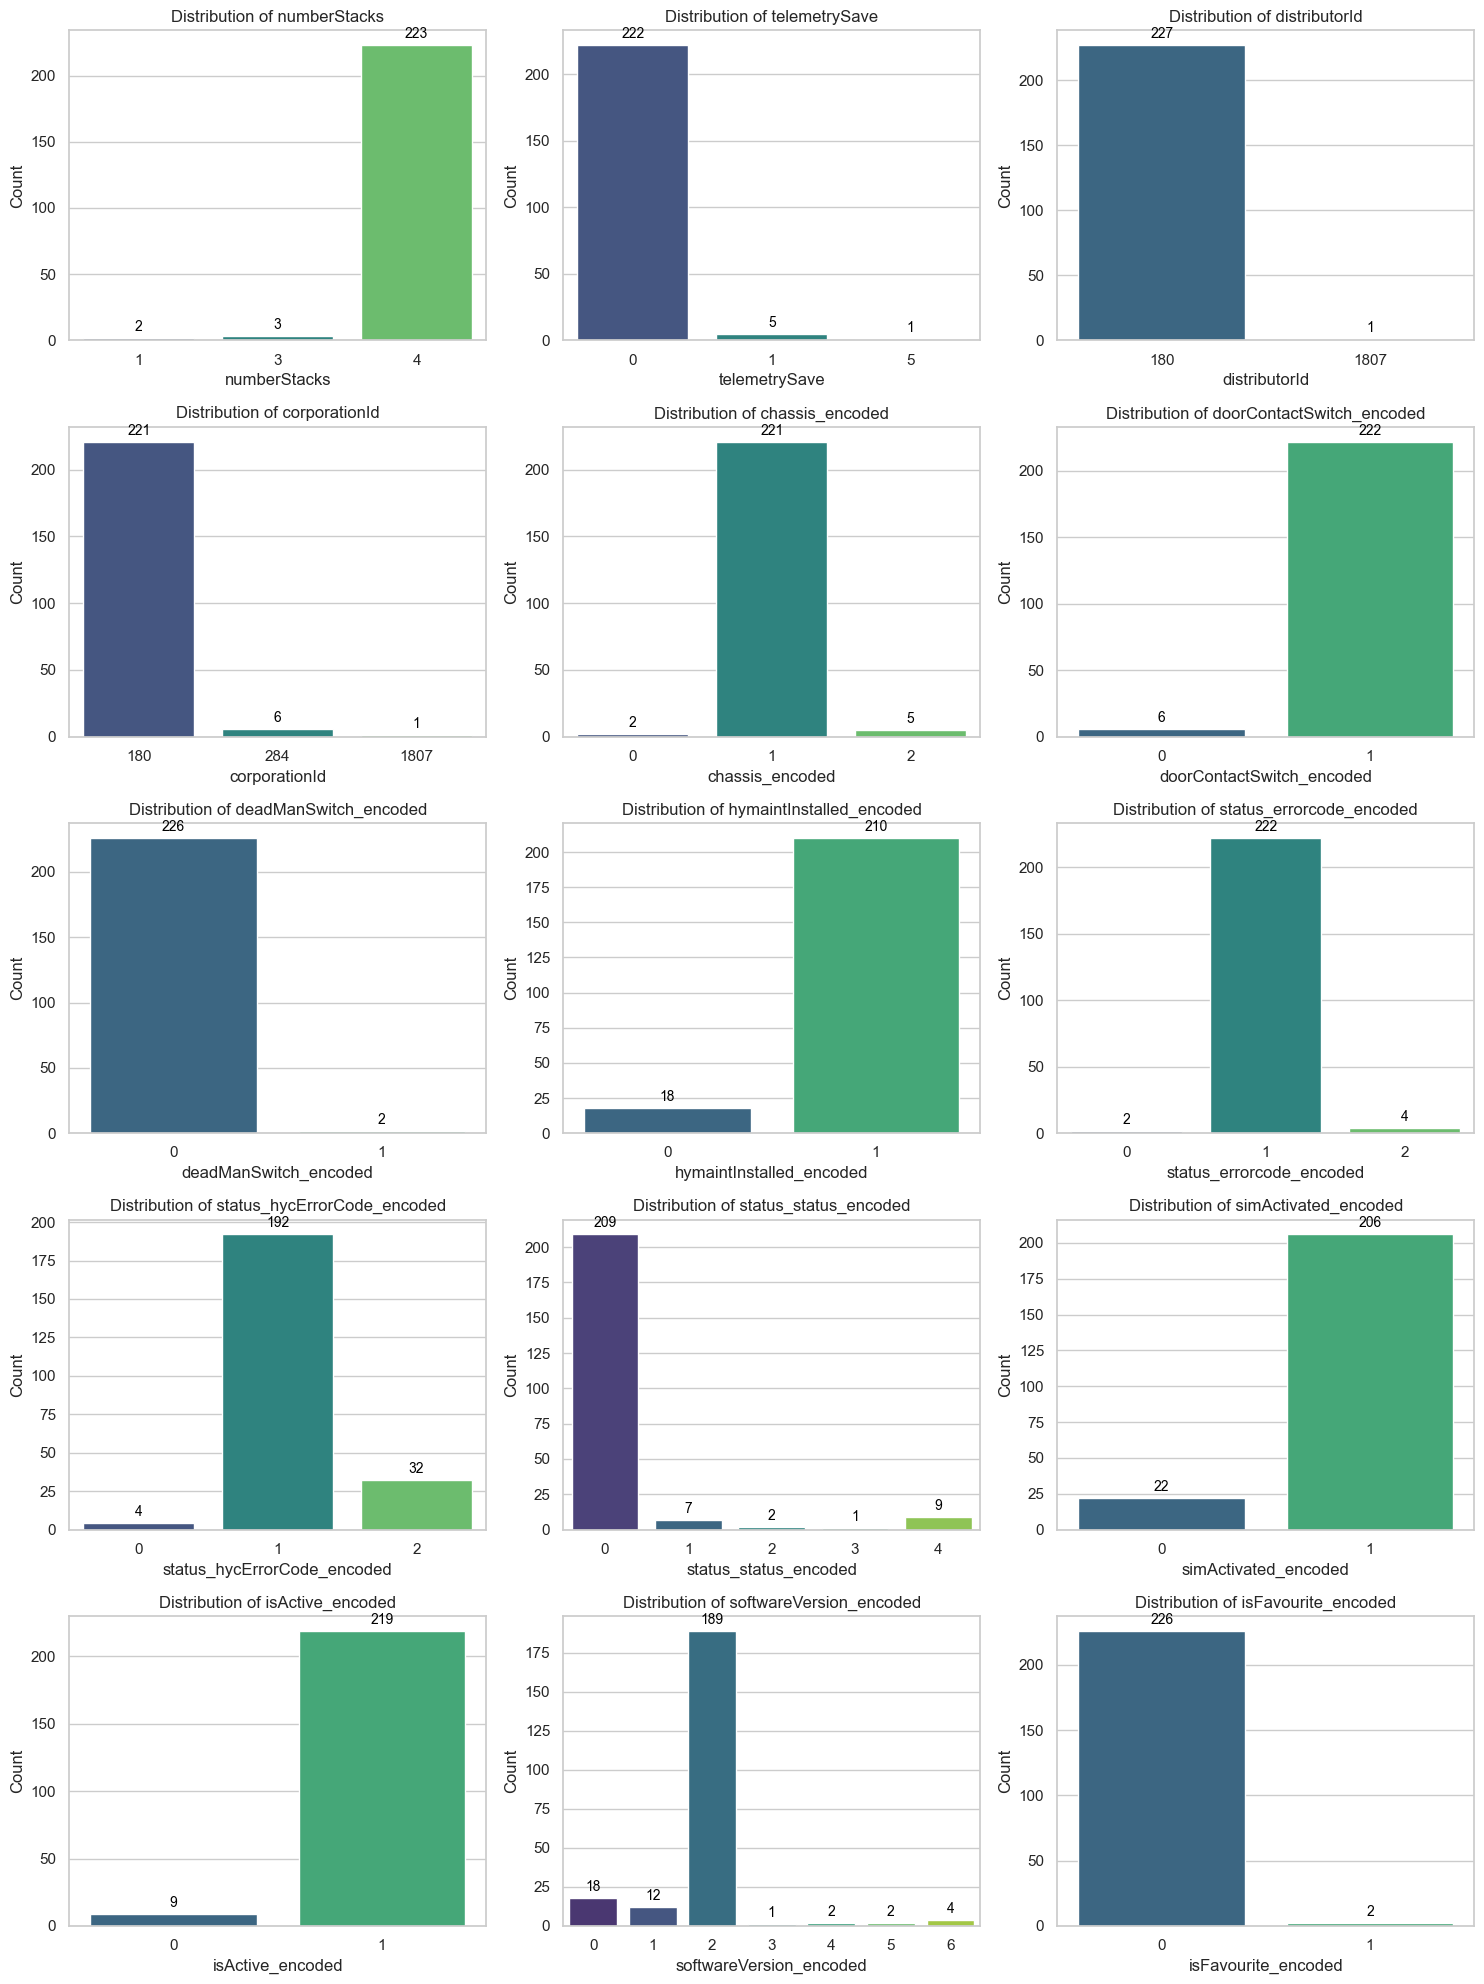

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style='whitegrid')

# List of features to plot
features_to_plot = [
    'numberStacks',
    'telemetrySave',
    'distributorId',
    'corporationId',
    'chassis_encoded',
    'doorContactSwitch_encoded',
    'deadManSwitch_encoded',
    'hymaintInstalled_encoded',
    'status_errorcode_encoded',
    'status_hycErrorCode_encoded',
    'status_status_encoded',
    'simActivated_encoded',
    'isActive_encoded',
    'softwareVersion_encoded',
    'isFavourite_encoded'
]

# Create a subplot for each feature with 3 columns and 5 rows
plt.figure(figsize=(15, 20))

# Create subplots for each feature
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(5, 3, i)
    ax = sns.countplot(x=feature, data=hypercarge_location_cleaned, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Add the count on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=10, color='black', 
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords='offset points')

plt.tight_layout()
plt.show()